# STAT 207 Lab 9: Linear Regression - [25 total points] - Solutions

Due: Wednesday, April 7 11:59pm CST



## <u>Case Study </u>: Weekend Smoking Habits of U.K. Smokers
We are interested in learning more about the relationship between how many cigarettes U.K. smokers smoke on the weekends and the following additional factors:
* the amount they smoke the weekdays
* age
* marital status
* sex.

Specifically, we would like to see if these variables can predict the amount that U.K. smokers smoke on the weekends.

The smoking.csv dataset contains a random sample of 421 U.K. smokers.


### Imports

In [32]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Read in the smoking.csv into a dataframe.

In [4]:
df = pd.read_csv("smoking.csv")
df.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets


### 1. [1.5 pt] Visualize the relationship between the amount that the smokers in the dataset smoke on the weekend vs. smoke on the weekdays. 

### Then, use this plot to describe the relationship. Remember there are four things you should be ready to discuss.


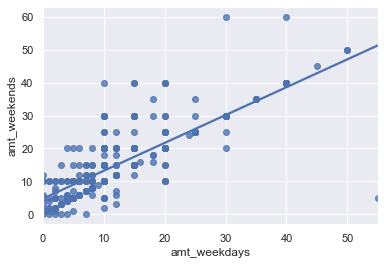

In [5]:
sns.regplot(x='amt_weekdays', y='amt_weekends', data=df, ci=False)
plt.show()

This relationship's direction is positive, meaning that it goes up and to the right. Additionally, the line of best fit is roughly linear, so the shape is linear. The relationship is relatively strong, as many of the points don't fall on the line of beast fit. Finally, it looks like there are multiple potential outliers in this graph. 

### 2. [1 pt] Calculate the correlation between the amount that the smokers in the dataset smoke on the weekend vs. smoke on the weekdays and interpret it.

In [6]:
df.corr()

,age,amt_weekends,amt_weekdays
age,1.000000,0.058642,0.192783
amt_weekends,0.058642,1.000000,0.802052
amt_weekdays,0.192783,0.802052,1.000000


R = 0.802052, and from this we can gather the following: Since the value of R is pretty close to 1, we can conclude that the relationship is strong and positive.

### 3. [0.5 pt]  Can you use this correlation to describe the strength of the relationship between the amount smoked on the weekdays and the weekend. Why or why not?

Yes, we can use this correlation coefficient to describe the strength of the relationship because the data has a linear relationship.

### 4. [1 pt]  In one figure (a figure can have multiple plots), visualize the relationship between the amount smoked on the weekdays and the weekends for every combination of sex and marital status. Plot a best fit line for each of these combinations (also in the same figure.

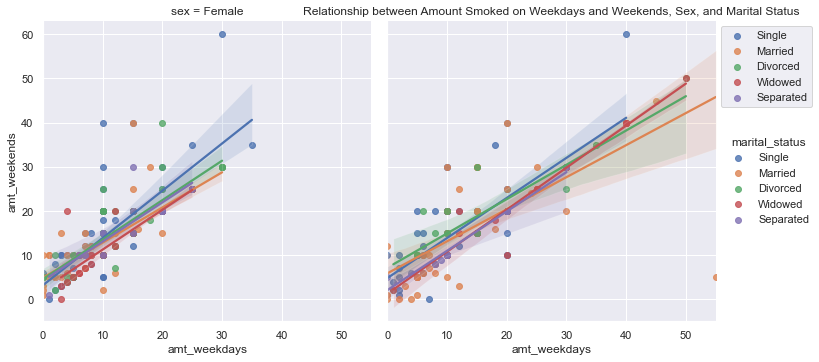

In [7]:
sns.lmplot(x='amt_weekdays', y='amt_weekends', hue = 'marital_status', col='sex', data=df)
plt.title('Relationship between Amount Smoked on Weekdays and Weekends, Sex, and Marital Status')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [8]:
df.groupby(['sex', 'marital_status']).corr()

age  amt_weekends  amt_weekdays
sex    marital_status                                                   
Female Divorced       age           1.000000      0.033771      0.027449
                      amt_weekends  0.033771      1.000000      0.825356
                      amt_weekdays  0.027449      0.825356      1.000000
       Married        age           1.000000      0.192906      0.270235
                      amt_weekends  0.192906      1.000000      0.805186
                      amt_weekdays  0.270235      0.805186      1.000000
       Separated      age           1.000000     -0.184835     -0.238553
                      amt_weekends -0.184835      1.000000      0.825585
                      amt_weekdays -0.238553      0.825585      1.000000
       Single         age           1.000000      0.087175      0.183180
                      amt_weekends  0.087175      1.000000      0.757588
                      amt_weekdays  0.183180      0.757588      1.000000
       Widowed        age           1.000000     -0.417753     -0.226351
                      amt_weekends -0.417753      1.000000      0.878221
                      amt_weekdays -0.226351      0.878221      1.000000
Male   Divorced       age           1.000000     -0.323897     -0.341073
                      amt_weekends -0.323897      1.000000      0.891828
                      amt_weekdays -0.341073      0.891828      1.000000
       Married        age           1.000000     -0.012128      0.126175
                      amt_weekends -0.012128      1.000000      0.741600
                      amt_weekdays  0.126175      0.741600      1.000000
       Separated      age           1.000000      0.303021      0.409740
                      amt_weekends  0.303021      1.000000      0.985361
                      amt_weekdays  0.409740      0.985361      1.000000
       Single         age           1.000000      0.164906      0.309638
                      amt_weekends  0.164906      1.000000      0.804401
                      amt_weekdays  0.309638      0.804401      1.000000
       Widowed        age           1.000000      0.273159      0.146958
                      amt_weekends  0.273159      1.000000      0.962760
                      amt_weekdays  0.146958      0.962760      1.000000

### 5. [1 pt]  Out of the 10 combinations of sex and marital status given in the data, which has the strongest linear association between the amount smoked on the weekdays and the amount smoked on the weekend. Which one had the weakest?

Separated males had the strongest correlation (0.985) and married males had the weakest correlation (0.742).

### 6. [2 pt]  Next, fit a linear regression model which has a response variable of the amount smoked on the weekend and the following explanatory variables:
* amount smoked on the weekdays
* sex
* age
* marital status

### Write out your multiple linear regression model equation.

In [10]:
results = smf.ols('amt_weekends ~ amt_weekdays+sex+age+marital_status', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.01e-91
Time:                        13:06:12   Log-Likelihood:                -1337.5
No. Observations:                 421   AIC:                             2691.
Df Residuals:                     413   BIC:                             2723.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.7400      1.450      5.340      0.000       4.891      10.589
sex[T.Male]                    -0.0387      0.600     -0.065      0.948      -1.217       1.140
marital_status[T.Married]      -1.3727      0.922     -1.488      0.137      -3.186       0.440
marital_status[T.Separated]    -1.6299      1.473     -1.107      0.269      -4.525       1.265
marital_status[T.Single]       -0.6161      1.012     -0.609      0.543      -2.606       1.373
marital_status[T.Widowed]      -1.0180      1.327     -0.767      0.443      -3.626       1.590
amt_weekdays                    0.8655      0.032     27.290      0.000       0.803       0.928
age                            -0.0546      0.026     -2.135      0.033      -0.105      -0.004
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.460
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                      14.819   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 7.74 + -0.0387(sexT.male) - 1.3727(marital_statusT.married) - 1.6299(marital_statusT.Seperated) -0.6161(marital_statusT.Single) - 1.0180 (marital_statusT.Widowed) + 0.8655 (amt_weekdays) - 0.0546(age)

### 7. [1 pt]  By hand, predict the amount of weekend cigarettes that are smoked by a 42 year old, single, female who smokes 12 cigarettes on the weekdays.

In [11]:
print(7.74 - 0.6161 + 0.8655*(12) - 0.0546*(42))

15.216700000000001


### 8. [1 pt]  Using Python functions, predict the amount of weekend cigarettes that are smoked by a 42 year old single female who smokes 12 cigarettes on the weekdays.

(See the last part of the Unit 13 notebook for help.)

In [12]:
results.predict(exog=dict(sex='Female',age=42,amt_weekdays=12,marital_status='Single'))

0    15.215399
dtype: float64

### 9 [0.5 pt] The first observation in the dataframe represents this smoker from the previous problem. What is the residual for this prediction we just calculated?

In [14]:
residual = 12 - 15.215399

In [15]:
print(residual)

-3.2153989999999997


### 10. [1 pt]  What percent of the variability of the amount of cigarettes smoked by this sample on the weekends is explained by the model?

In [16]:
results.rsquared

0.6552925583740852

### 11. [5 pt]  Check the five conditions for conducting inference on the population intercept and slopes associated with this model. Discuss whether each condition is or is not met.

Condition 1: Linearity Condition
Since the distribution of points in the plot below are roughly evenly distributed above and below the line, we can say this condition is met.

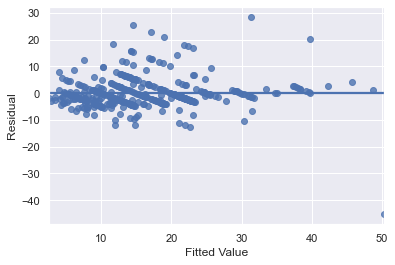

In [17]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 2: Constant Variability of Residuals Condition
Since the y-axis spread of points in the plot below changes as we move form left to right, therefore the condition is not met.

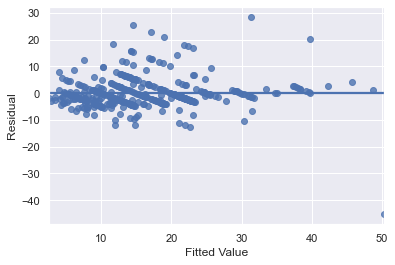

In [18]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 3: Normality of Residuals
Since the normality of the residuals plot is slightly skewed to the right, we can say this condition is not met.

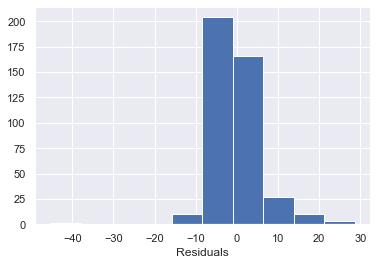

In [20]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

Condition 4: Independence of Residuals
*We can verify that the data is randomly sampled
*

Condition 5:No Multicollinearity

Since there are multiple explanitory variables with strong linear associations, they are collinear. Therefore, this condition is not met.

### 12.  Next, we would like to test whether there is sufficient evidence to suggest that the age slope in the corresponding population model (ie. considering ALL U.K. smokers) is non-zero.

#### 12.1. [1 pt]  Formulate the hypotheses for this test.

Ho: Slope(age) = 0
Ha: Slop(age) != 0

#### 12.2 [2 pt]  Calculate a 90% confidence interval for this slope.

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.01e-91
Time:                        15:24:34   Log-Likelihood:                -1337.5
No. Observations:                 421   AIC:                             2691.
Df Residuals:                     413   BIC:                             2723.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.7400      1.450      5.340      0.000       4.891      10.589
sex[T.Male]                    -0.0387      0.600     -0.065      0.948      -1.217       1.140
marital_status[T.Married]      -1.3727      0.922     -1.488      0.137      -3.186       0.440
marital_status[T.Separated]    -1.6299      1.473     -1.107      0.269      -4.525       1.265
marital_status[T.Single]       -0.6161      1.012     -0.609      0.543      -2.606       1.373
marital_status[T.Widowed]      -1.0180      1.327     -0.767      0.443      -3.626       1.590
amt_weekdays                    0.8655      0.032     27.290      0.000       0.803       0.928
age                            -0.0546      0.026     -2.135      0.033      -0.105      -0.004
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.460
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                      14.819   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
point_estimate= -0.0546
print("Point Estimate: ", point_estimate)

Point Estimate:  -0.0546


In [25]:
standard_error= 0.026
print("Standard Error:", standard_error)

Standard Error: 0.026


In [27]:
critical_value=t.ppf(0.95, df.shape[0] - 1)
lower_bound = point_estimate-critical_value*standard_error
upper_bound = point_estimate+critical_value*standard_error
print(lower_bound, " , ", upper_bound)

-0.09746073253931808  ,  -0.011739267460681914


#### 12.3 [0.5 pt]  Make a conclusion about your hypotheses using this confidence interval.

We are 90% confident that the slope of age lies within these bounds shown above, so we can reject the null hypothesis. Therefore, we have convicining evidence that the Slope mean is different than the null hypothesis. We have convincing evidence that the slope is not equal to zero.

#### 12.4 [0.5 pt]  Calculate the test statistic for this test by hand. Verify this test statistic in your regression output table.

In [29]:
test_stat = (point_estimate-0)/standard_error
print(test_stat)

-2.1


These values are roughly the same. 

#### 12.5 [1 pt]  Use this test statistic to calculate the p-value for this hypothesis test (using the distribution that this test statistic is an observation from). Verify this p-value in your regression output table.

In [31]:
pvalue=2*(1-t.cdf(np.abs(test_stat), df = df.shape[0]))
pvalue

0.036323341997709147

This value is greater than 0.033

#### 12.6 [0.5 pt]  Use this p-value to make a conclusion about your hypotheses, using a significance level of $\alpha=0.10$.

Since 0.033 < 0.10, we have convincing evidence that the alternate hypothesis is true. We have convincing evidence that the slope is not equal to zero. We can reject the null hypothesis.

#### 12.7 [1 pt]  What is the probability that the population slope for age was *actually* equal to zero in the previous test and that we incorrectly rejected it in our test?

The probability that the slope was actually equal to zero is 3.3%.

### 13. Next, we would like to test whether there is sufficient evidence to suggest that at least one of the population slopes in the corresponding population model (ie. considering ALL U.K. smokers) is non-zero.

#### 13.1 [1 pt]  Formulate the hypotheses for this test.

Ho: Slope(sex) = Slope(Married) = Slope(Seperated) = Slope(Single) = Slope(Widowed) = Slope(Weekdays) = Slope(Age) = 0
Ha: At least one slope above != 0 

#### 13.2 [0.5 pt]  What is the test statistic for this hypothesis test?

In [33]:
test_stat=112.2

In [34]:
print(test_stat)

112.2


#### 13.3 [1 pt]  Use the distribution that this test statistic is an observation from to calculate the p-value for this test.

In [35]:
pvalue = 1-f.cdf(test_stat, dfn = 7, dfd = df.shape[0])
pvalue

1.1102230246251565e-16

#### 13.4 [0.5 pt]  Make a conclusion about your hypotheses using a significance level of $\alpha=0.10$.

Since the pvalue is nearly 0, we reject the null hypothesis. There is sufficient evidence that one of the slopes does not equal zero. Therefore, we have convicing evidence that the alternate hypothesis is true. 